# Libraries

In [27]:
import tqdm
import numpy as np
import matplotlib.pyplot as plt
from IPython import display
import time
%matplotlib inline

# Class of Genetic Algorithm

In [28]:
class GeneticAlgorithm(object):
    """
    [Arguments]
        func: Function to find the maximum values

        n_bits: Number of binrary bits

        n_workers: Number of workers

        n_gen: Number of generations

        mating_prob: Probability of mating

        mutation_prob: Probability of mutation

        x_range: Range of x

        x_n_points: Number of dsicrete points of x
    """
    def __init__(self, func, n_bits, n_workers, n_gen,
                mating_prob, mutation_prob, x_range, x_n_points):
        super(GeneticAlgorithm, self).__init__()
        # Parameters of the Genetic Algorithm
        self.func = func
        self.n_bits = n_bits
        self.n_workers = n_workers
        self.n_gen = n_gen
        self.mating_prob = mating_prob
        self.mutation_prob = mutation_prob
        self.x_range = x_range
        self.x_n_points = x_n_points

        # Inialize variables
        self.workers = np.random.randint(0, 2, size=(self.n_workers, self.n_bits))
        self.best_worker = None

    # Compute the objective
    def compute_objective(self, pred, esp=1e-8):
        return pred + esp - np.min(pred)

    # Convert binary to decimal
    def decode(self, workers):
        delta = (self.x_range[1] -  self.x_range[0])
        norm_range = workers.dot(2 ** np.arange(self.n_bits)[::-1]) / (2**self.n_bits-1)
        return norm_range * delta + self.x_range[0]

    # Natural selection
    def select(self, objective):    
        idx = np.random.choice(np.arange(self.n_workers), size=self.n_workers, p=objective/objective.sum())
        return self.workers[idx]

    # Mating
    def mate(self, parent, workers):     
        if np.random.rand() < self.mating_prob:
            idx = np.random.randint(0, self.n_workers, size=1)
            cross_points = np.random.randint(0, 2, size=self.n_bits).astype(np.bool)
            parent[cross_points] = workers[idx, cross_points]
        return parent

    # Mutation
    def mutate(self, child):
        for i in range(self.n_bits):
            if np.random.rand() < self.mutation_prob:
                child[i] = 1 if child[i]==0 else 0
        return child

    # Perform a step of evolution
    def step(self):
        real_vals = self.decode(self.workers)
        out_vals = func(real_vals)
        objective = self.compute_objective(out_vals)
        self.best_worker = self.workers[np.argmax(objective), :]
        self.best_objective = self.func(self.decode(self.best_worker))

        self.workers = self.select(objective)
        workers_copy = self.workers.copy()
        for parent in self.workers:
            child = self.mate(parent, workers_copy)
            child = self.mutate(child)
            parent[:] = child

        return real_vals, out_vals

    # Perform the whole evolution
    def evolve(self):
        fig = plt.figure(figsize=(25, 8))
        ax1 = fig.add_subplot(1,2,1); ax1.set_title("Workers evolution")
        x = np.linspace(*self.x_range, self.x_n_points)
        ax1.plot(x, func(x))
        ax2 = fig.add_subplot(1,2,2); ax2.set_title("Objective evolution")

        best_objectives = []
        for i in tqdm.tqdm(range(self.n_gen)):
            # Perform a step of evolution
            real_vals, out_vals = self.step()

            # Plot the workers evolution
            if 'sca' in locals():
                sca.remove()
            sca = ax1.scatter(real_vals, out_vals, s=self.x_n_points, lw=0, c='red', alpha=0.5)

            # Plot the objective evolution
            best_objectives.append(self.best_objective)
            ax2.plot(best_objectives, "b")

            display.clear_output(wait=True)
            display.display(plt.gcf())
            time.sleep(0.01)

# Main execution

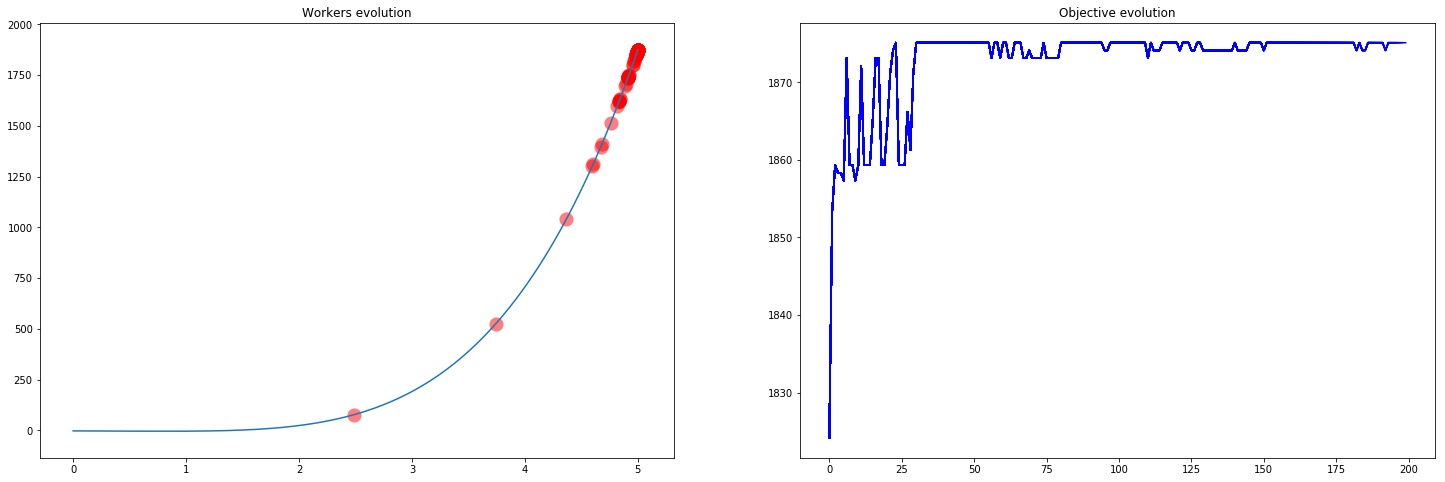



100%|██████████| 200/200 [01:13<00:00,  2.72it/s]




Optimal result:
(x, y)max: (5.0000, 1875.1080)


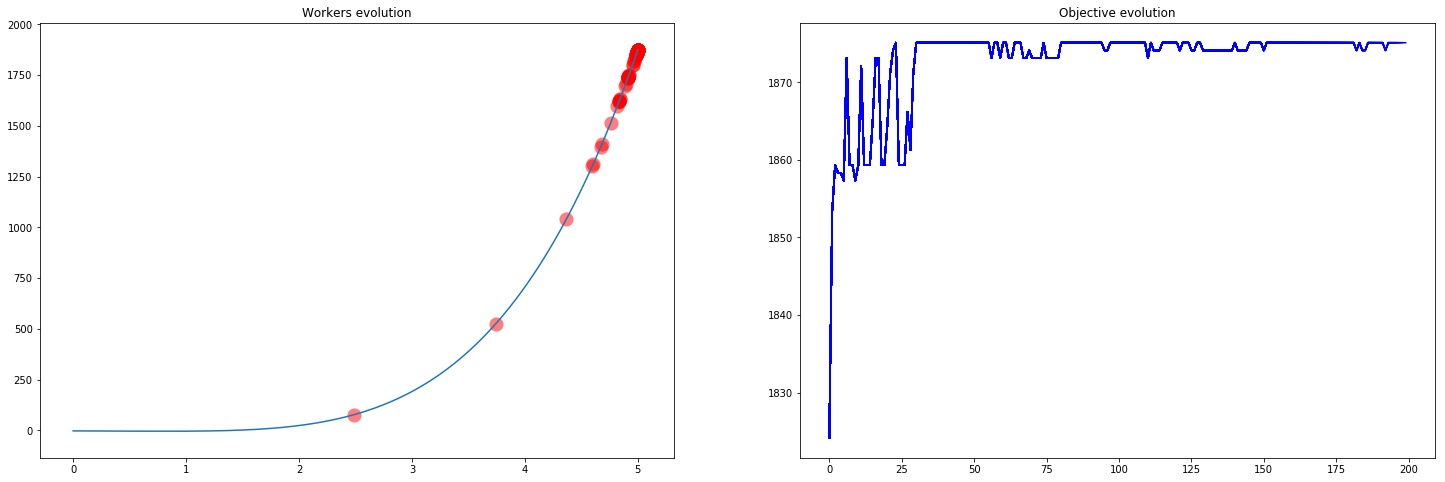

In [29]:
# Define a function, which we want to find its maximum
func = lambda x: 4*x**4 - 5*x**3 + np.exp(-2*x) - np.sin(x) - 3*np.cos(x)

# Instantiate a Genetic Algorithm
GA = GeneticAlgorithm(func=func, n_bits=13, n_workers=100, n_gen=200,
    mating_prob=0.95, mutation_prob=0.01, x_range=[0, 5], x_n_points=200)

# Evolution
GA.evolve()
best_worker = GA.best_worker
x_opt = GA.decode(best_worker)
y_opt = func(x_opt)
print("\nOptimal result:")
print("(x, y)max: (%.4f, %.4f)" % (x_opt, y_opt))